IPYNB notebook to preprocess data imported from matlab, and convert it into the format accepted by the input

plotting the experimental data

In [2]:
import scipy.io
import pandas as pd
import matplotlib as plt
import numpy as np
from matplotlib import pyplot
from matplotlib import markers

Text(0.5, 1.0, 'PBCO experimental fitted peaks')

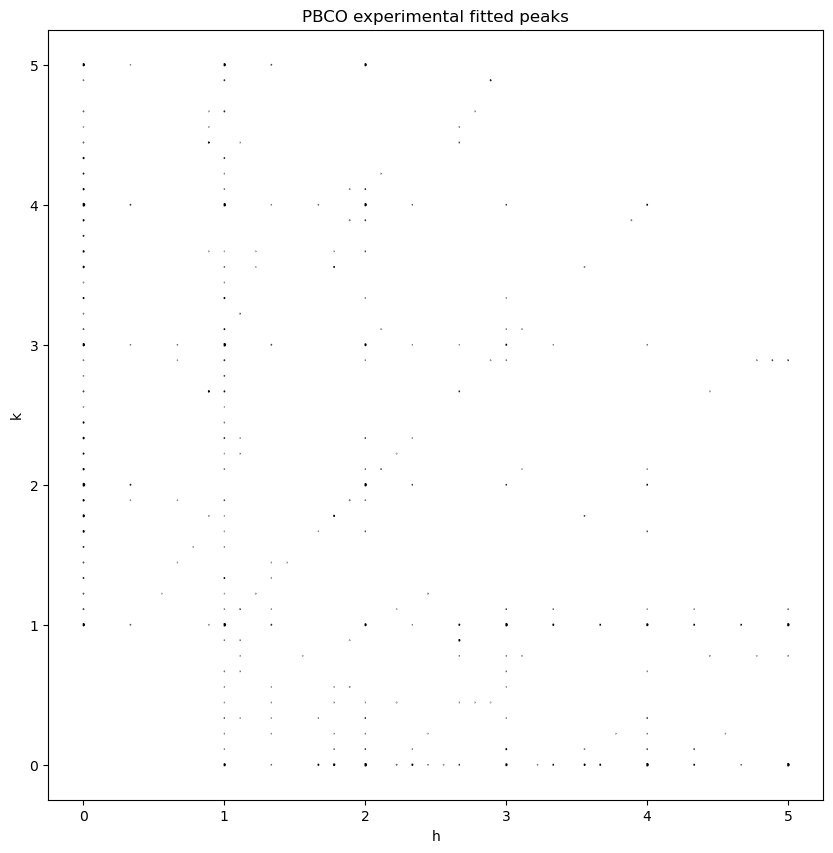

In [5]:
# Load data
h_coords = pd.read_csv('raw_data/h_coords.csv', header=None).values.flatten()
k_coords = pd.read_csv('raw_data/k_coords.csv', header=None).values.flatten()
intensity_arr = pd.read_csv('raw_data/intensity_arr.csv', header=None).values

h , k = np.meshgrid(h_coords , k_coords)

h_flat = h.flatten()
k_flat = k.flatten()
intensity_flat = intensity_arr.flatten()

copy_h_flat = h_flat
h_flat = k_flat
k_flat = copy_h_flat


pyplot.scatter(h_flat , k_flat , s=intensity_flat  , color='blue', edgecolor="black",
               label='Exp', marker=markers.MarkerStyle("o", fillstyle="right"))
#change figure size
pyplot.gcf().set_size_inches(10, 10)
#add labels
pyplot.xlabel('h')
pyplot.ylabel('k')
#add title
pyplot.title('PBCO experimental fitted peaks')

create a csv file with 4 columns. first column is for h_coords, then for k_coords, and then for l_coords (all equal to 0). then another row for the experimental intensity, with title 'intensity_exp'.

In [8]:
#create a csv file with the data, and each first row is the name of the column : h ,k , l , intensity_exp
data = pd.read_csv('C:/Users/User/Desktop/uzh_intern/CrystalClearFit/alrisDistortionFit/La2CuO4/raw_data/raw_coords.txt',delim_whitespace=True, header=None)
h = data.iloc[:, 0]
k = data.iloc[:, 1]
l = data.iloc[:, 2]
intensity = data.iloc[:,3]

print(data)
data1 = pd.DataFrame({
    'h': h,
    'k': k,
    'l': l,  # Assuming l is zero for this exampleP
    'intensity_exp': intensity
})

data1.to_csv('C:/Users/User/Desktop/uzh_intern/CrystalClearFit/alrisDistortionFit/La2CuO4/raw_data/peaks1.csv', index=False)


    0  1   2      3
0  -2 -3   0  354.4
1   4  3   0  232.7
2  -4 -5   0  914.6
3  -4 -7   0  313.4
4   6  5   0  360.9
.. .. ..  ..    ...
62  7  0  -7  561.9
63  7  0  15  493.4
64  7  0  23  863.8
65  9  0 -15  569.2
66  9  0  -9  870.4

[67 rows x 4 columns]


C:\Users\User\AppData\Local\Temp\ipykernel_19800\1705823412.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('C:/Users/User/Desktop/uzh_intern/CrystalClearFit/alrisDistortionFit/La2CuO4/raw_data/raw_coords.txt',delim_whitespace=True, header=None)


Find where to add the shifts in the list of atom coordinates. 

add the atom displacement distortions

1. check the cif file, section `_iso_parent-to-child.transform_Pp_abc` ( very end of the cif file), change the transformation accordingly in `functions`

# Print all the atom coords

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants
import math
import xrayutilities as xu


crystal = xu.materials.Crystal.fromCIF('C:/Users/User/Desktop/uzh_intern/CrystalClearFit/alrisDistortionFit/La2CuO4/raw_data/La2CuO4_info.cif')
for a, n, c, d in crystal.lattice.base():
    print([a, [n[0], n[1], n[2]]])

#User: copy the output of the above code into PrNiO3_C4_coords.txt
# using ctrl + f:
# 1. replace (number) with 'number' 
# 2. remove all commas
# 3. replace double spacing with single spacing


[La3+ (57), [0.50345, 0.125, 0.36111]]
[La3+ (57), [0.003449999999999953, 0.625, 0.36111]]
[La3+ (57), [0.49655000000000005, 0.125, 0.63889]]
[La3+ (57), [0.99655, 0.625, 0.63889]]
[La3+ (57), [0.49655000000000005, 0.875, 0.63889]]
[La3+ (57), [0.99655, 0.375, 0.63889]]
[La3+ (57), [0.50345, 0.875, 0.36111]]
[La3+ (57), [0.003449999999999953, 0.375, 0.36111]]
[La3+ (57), [0.50345, 0.25, 0.86111]]
[La3+ (57), [0.003449999999999953, 0.75, 0.86111]]
[La3+ (57), [0.49655000000000005, 0.25, 0.13888999999999996]]
[La3+ (57), [0.99655, 0.75, 0.13888999999999996]]
[La3+ (57), [0.49655000000000005, 0.75, 0.13888999999999996]]
[La3+ (57), [0.99655, 0.25, 0.13888999999999996]]
[La3+ (57), [0.50345, 0.75, 0.86111]]
[La3+ (57), [0.003449999999999953, 0.25, 0.86111]]
[La3+ (57), [0.50345, 0.375, 0.36111]]
[La3+ (57), [0.003449999999999953, 0.875, 0.36111]]
[La3+ (57), [0.49655000000000005, 0.375, 0.63889]]
[La3+ (57), [0.99655, 0.875, 0.63889]]
[La3+ (57), [0.49655000000000005, 0.625, 0.63889]]
[La3

# The following code adds the atomic displacement variables. 

Things to do beforehand:
1. Go to `PrNiO2_C4_info.cif` , find `_atom_site_fract_symmform`
2. copy the info in `_atom_site_fract_symmform` to a new file called `PrNiO2_C4_atom_site_fract_symmform.txt`
3. In `PrNiO2_C4_atom_site_fract_symmform.txt`:
3.1 replace commas with a single space
3.2 replace double space with single space
4. change the output file name to the corresponding crystal

Output:
`PrNiO2_C4_coords_processed.txt` and `PrNiO2_C4_shift_names.txt`

1. in `PrNiO2_C4_coords_processed.txt` , remove all "
2. remove the comma in the last line
3. copy all into `functions`, and into `atom_position_list`

1. in `PrNiO2_C4_shift_names.txt` , copy to variables list in `atom_position_list`

In [4]:
#load a text file into a dataframe
PBCO_coords = pd.read_csv('raw_data/La2CuO4_coords.txt' , delim_whitespace=True, header=None)
PBCO_distortions = pd.read_csv('raw_data/La2CuO4_atom_site_fract_symmform.txt' , delim_whitespace=True, header=None)

#load PBCO_distortions into a list of lists
PBCO_distortions = PBCO_distortions.values.tolist()
PBCO_coords = PBCO_coords.values.tolist()

#create a new column in PBCO_distortions, which adds the second column up cumulatively
PBCO_distortions = pd.DataFrame(PBCO_distortions)
PBCO_coords = pd.DataFrame(PBCO_coords)

print(PBCO_coords)
print(PBCO_distortions)

PBCO_coords[2] = PBCO_coords[2].astype(str)
PBCO_coords[3] = PBCO_coords[3].astype(str)
PBCO_coords[4] = PBCO_coords[4].astype(str)


PBCO_distortions[11] = PBCO_distortions[2].cumsum()

#create a list to store all the names of shift name variables
shift_names = []

for i in range(len(PBCO_distortions)):
    #take the ith and ith + 1 element in the last column, and load them into a variable called num_atom_start and num_atom_end. if i is 1 , then num_atom_start must equal to 1, and num_atom_end must equal to the first element in the last column
    if i == 0:
        num_atom_start = 0
        num_atom_end = PBCO_distortions.iloc[i, -1]
    else:
        num_atom_start = PBCO_distortions.iloc[i, -1] - PBCO_distortions.iloc[i, 2]
        num_atom_end = PBCO_distortions.iloc[i, -1]
    
    #check if there are Dx , Dy , Dz in the 3rd , 4th and 5th columns of PBCO_distortions
    if 'Dx' in PBCO_distortions.iloc[i, 8]:
        #string the char in the first column ith row to 'Dx'
        dx_shift_name = PBCO_distortions.iloc[i, 0] + '_dx'
    else:
        dx_shift_name = 0
    if 'Dy' in PBCO_distortions.iloc[i, 9]:
        #string the char in the first column ith row to 'Dy'
        dy_shift_name = PBCO_distortions.iloc[i, 0] + '_dy'
    elif 'Dx' in PBCO_distortions.iloc[i, 9]:
        #string the char in the first column ith row to 'Dy'
        dy_shift_name = PBCO_distortions.iloc[i, 0] + '_dx'
    else:
        dy_shift_name = 0
    if 'Dz' in PBCO_distortions.iloc[i, 10]:
        #string the char in the first coumn ith row to 'Dz'
        dz_shift_name = PBCO_distortions.iloc[i, 0] + '_dz' 
    elif 'Dy' in PBCO_distortions.iloc[i, 10]:
        #string the char in the first column ith row to 'Dz'
        dz_shift_name = PBCO_distortions.iloc[i, 0] + '_dy'
    elif 'Dx' in PBCO_distortions.iloc[i, 10]:
        #string the char in the first column ith row to 'Dz'
        dz_shift_name = PBCO_distortions.iloc[i, 0] + '_dx'
    else:
        dz_shift_name = 0



    if dx_shift_name != 0:
        shift_names.append(dx_shift_name)
        for j in range(num_atom_start, num_atom_end):
            PBCO_coords.iloc[j, 2] = str(PBCO_coords.iloc[j, 2] + ' + ') + dx_shift_name
    if dy_shift_name != 0:
        shift_names.append(dy_shift_name)
        for j in range(num_atom_start, num_atom_end):
            PBCO_coords.iloc[j, 3] = str(PBCO_coords.iloc[j, 3] + ' + ') + dy_shift_name
    if dz_shift_name != 0:
        shift_names.append(dz_shift_name)
        for j in range(num_atom_start, num_atom_end):
            PBCO_coords.iloc[j, 4] = str(PBCO_coords.iloc[j, 4] + ' + ') + dz_shift_name


for k in range(len(PBCO_coords)):
    PBCO_coords.iloc[k, 0] = str("['" + PBCO_coords.iloc[k, 0] + "'")
    PBCO_coords.iloc[k, 2] = str('[' + PBCO_coords.iloc[k, 2])
    PBCO_coords.iloc[k, 4] = str(PBCO_coords.iloc[k, 4] + "]],")

print(PBCO_coords)
#save PBCO_coords to a csv file
PBCO_coords.to_csv('raw_data/La2CuO4_coords_processed.txt', index=False, header=False)


print(shift_names)
# Convert shift_names to a DataFrame
shift_names = pd.DataFrame(shift_names)
#print all shift_names into a single line
shift_names_txt = shift_names[0].str.cat(sep=', ')
print(shift_names)
# Save shift_names to a text file
with open('raw_data/La2CuO4_shift_names.txt', 'w') as f:
    f.write(shift_names_txt)


C:\Users\User\AppData\Local\Temp\ipykernel_18036\3880563334.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  PBCO_coords = pd.read_csv('raw_data/La2CuO4_coords.txt' , delim_whitespace=True, header=None)
C:\Users\User\AppData\Local\Temp\ipykernel_18036\3880563334.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  PBCO_distortions = pd.read_csv('raw_data/La2CuO4_atom_site_fract_symmform.txt' , delim_whitespace=True, header=None)


        0     1        2       3        4
0    La3+  '57'  0.50345  0.1250  0.36111
1    La3+  '57'  0.00345  0.6250  0.36111
2    La3+  '57'  0.49655  0.1250  0.63889
3    La3+  '57'  0.99655  0.6250  0.63889
4    La3+  '57'  0.49655  0.8750  0.63889
..    ...   ...      ...     ...      ...
411   O2-   '8'  0.87500  0.5625  0.25700
412   O2-   '8'  0.37500  0.9375  0.25700
413   O2-   '8'  0.87500  0.4375  0.25700
414   O2-   '8'  0.62500  0.9375  0.74300
415   O2-   '8'  0.12500  0.4375  0.74300

[416 rows x 5 columns]
        0     1   2  3        4       5        6      7   8   9   10
0    La1_1  La3+   8  j  0.50345  0.1250  0.36111  1.000  Dx  Dy  Dz
1    La1_2  La3+   8  j  0.50345  0.2500  0.86111  1.000  Dx  Dy  Dz
2    La1_3  La3+   8  j  0.50345  0.3750  0.36111  1.000  Dx  Dy  Dz
3    La1_4  La3+   4  i  0.00345  0.0000  0.86111  1.000  Dx   0  Dz
4    La1_5  La3+   4  i  0.50345  0.0000  0.86111  1.000  Dx   0  Dz
5    La1_6  La3+   8  j  0.74655  0.2500  0.36111  1.000  

# the following code is only applicable if the parameters are the atomic displacements. to fit the modes directly, skip to the next section

Preprocess get mode amplitudes

In [ ]:
mode_names = pd.read_csv('raw_data/displacivemode_names.txt' , delim_whitespace=True, header=None)
mode_matrix = pd.read_csv('raw_data/mode_matrix.txt' , delim_whitespace=True, header=None)

#CONVERT TO A LIST OF LISTS
mode_names = mode_names.values.tolist()

# Convert mode_names to a DataFrame
mode_names = pd.DataFrame(mode_names)

num_modes = len(mode_names) 
print(num_modes)

mode_name1 = []
# rewrite the mode names into a new list with the first column as the mode name 
for i in range(num_modes):
    mode_name1.append(str('"' + str(mode_names.iloc[i, 1]) + '"' + ': '))

print(mode_name1)


445
['"[1/9,1/9,0]V1(a,0;a,0)[Pr1:h:dsp]B3u(a)": ', '"[1/9,1/9,0]V1(a,0;a,0)[Pr1:h:dsp]B2u(a)": ', '"[0,1/9,0]DT1(a,0)[Pr1:h:dsp]B2u(a)": ', '"[0,2/9,0]DT1(a,0)[Pr1:h:dsp]B2u(a)": ', '"[0,1/3,0]DT1(a,0)[Pr1:h:dsp]B2u(a)": ', '"[0,4/9,0]DT1(a,0)[Pr1:h:dsp]B2u(a)": ', '"[1/9,0,0]SM1(a,0)[Pr1:h:dsp]B3u(a)": ', '"[2/9,0,0]SM1(a,0)[Pr1:h:dsp]B3u(a)": ', '"[1/3,0,0]SM1(a,0)[Pr1:h:dsp]B3u(a)": ', '"[4/9,0,0]SM1(a,0)[Pr1:h:dsp]B3u(a)": ', '"[1/9,2/9,0]V1(a,0;a,0)[Pr1:h:dsp]B3u(a)": ', '"[1/9,2/9,0]V1(a,0;a,0)[Pr1:h:dsp]B2u(a)": ', '"[1/9,1/3,0]V1(a,0;a,0)[Pr1:h:dsp]B3u(a)": ', '"[1/9,1/3,0]V1(a,0;a,0)[Pr1:h:dsp]B2u(a)": ', '"[1/9,4/9,0]V1(a,0;a,0)[Pr1:h:dsp]B3u(a)": ', '"[1/9,4/9,0]V1(a,0;a,0)[Pr1:h:dsp]B2u(a)": ', '"[2/9,1/9,0]V1(a,0;a,0)[Pr1:h:dsp]B3u(a)": ', '"[2/9,1/9,0]V1(a,0;a,0)[Pr1:h:dsp]B2u(a)": ', '"[2/9,2/9,0]V1(a,0;a,0)[Pr1:h:dsp]B3u(a)": ', '"[2/9,2/9,0]V1(a,0;a,0)[Pr1:h:dsp]B2u(a)": ', '"[2/9,1/3,0]V1(a,0;a,0)[Pr1:h:dsp]B3u(a)": ', '"[2/9,1/3,0]V1(a,0;a,0)[Pr1:h:dsp]B2u(a)": ', '

C:\Users\User\AppData\Local\Temp\ipykernel_25560\395762485.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  mode_names = pd.read_csv('raw_data/displacivemode_names.txt' , delim_whitespace=True, header=None)
C:\Users\User\AppData\Local\Temp\ipykernel_25560\395762485.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  mode_matrix = pd.read_csv('raw_data/mode_matrix.txt' , delim_whitespace=True, header=None)


In [168]:
#make a zeros array with len(shift_names) rows and columns
mode_np_matrix = np.zeros((num_modes, num_modes))

print(mode_np_matrix.shape)
print(mode_np_matrix)

#load the third column values from mode_matrix into mode_np_matrix.first column of ith row is the row number of the matrix, second column is the column number of the matrix, third column is the value of the matrix
for i in range(len(mode_matrix)):
    row = mode_matrix.iloc[i, 0] - 1
    col = mode_matrix.iloc[i, 1] - 1
    value = mode_matrix.iloc[i, 2]
    mode_np_matrix[row, col] = value

print(mode_np_matrix)


print(mode_name1)


for row in range(num_modes):
    for col in range(num_modes):
        if mode_np_matrix[row, col] != 0:
            shift_name = shift_names.iloc[col,0]
            
            if mode_np_matrix[row, col] < 0:
                matrix_element = mode_np_matrix[row, col] * -1
                string_mode_np_matrix = str(matrix_element)
                dependent = ' - ' + string_mode_np_matrix + ' * ' + shift_name
            else:
                string_mode_np_matrix = str(mode_np_matrix[row, col])
                dependent = ' + ' + string_mode_np_matrix + ' * ' + shift_name
            
            mode_name1[row] = str(mode_name1[row]) + dependent
        else:
            mode_name1[row] = str(mode_name1[row])



# Save mode_names to a text file without using pandas
with open('raw_data/mode_names_processed.txt', 'w') as f:
    for name in mode_name1:
        f.write(name + ',' + '\n')


'''mode_names_txt = pd.DataFrame(mode_name1)
mode_names_txt.to_csv('raw_data/mode_names_processed.txt', index=False, header=False)

'''


(445, 445)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[-0.32635  0.       0.      ...  0.       0.       0.     ]
 [ 0.       0.32635  0.3473  ...  0.       0.       0.     ]
 [-0.17365  0.       0.      ...  0.       0.       0.     ]
 ...
 [ 0.       0.       0.      ...  0.       0.      -0.17365]
 [ 0.       0.       0.      ...  0.03015  0.       0.     ]
 [ 0.       0.       0.      ...  0.      -0.17365  0.     ]]
['"[1/9,1/9,0]V1(a,0;a,0)[Pr1:h:dsp]B3u(a)": ', '"[1/9,1/9,0]V1(a,0;a,0)[Pr1:h:dsp]B2u(a)": ', '"[0,1/9,0]DT1(a,0)[Pr1:h:dsp]B2u(a)": ', '"[0,2/9,0]DT1(a,0)[Pr1:h:dsp]B2u(a)": ', '"[0,1/3,0]DT1(a,0)[Pr1:h:dsp]B2u(a)": ', '"[0,4/9,0]DT1(a,0)[Pr1:h:dsp]B2u(a)": ', '"[1/9,0,0]SM1(a,0)[Pr1:h:dsp]B3u(a)": ', '"[2/9,0,0]SM1(a,0)[Pr1:h:dsp]B3u(a)": ', '"[1/3,0,0]SM1(a,0)[Pr1:h:dsp]B3u(a)": ', '"[4/9,0,0]SM1(a,0)[Pr1:h:dsp]B3u(a)": ', '"[1/9,2/9,0]V1(a,0;a,0)[Pr1:h

"mode_names_txt = pd.DataFrame(mode_name1)\nmode_names_txt.to_csv('raw_data/mode_names_processed.txt', index=False, header=False)\n\n"

# This is the next section. fit the mode amplitudes directly
Things to do beforehand:
1. create txt file `PrNiO2_C4_mode_amp_bounds.txt`
2. from `PrNiO2_C4.str` file, at mode definitions, copy all mode names and their info
3. run the file

the code should generate 2 files: `PrNiO2_C4_mode_names_variable` , `PrNiO2_C4_max_bound_vectors`

`PrNiO2_C4_mode_names_variable.txt`: copy this into `functions`, into `shift_atoms`.

`PrNiO2_C4_max_bound_vectors.txt`: copy this into `gradientdescent.ipynb` to `max_mode_amps`




In [6]:
mode_amp_bounds = pd.read_csv('C:/Users/User/Desktop/uzh_intern/CrystalClearFit/alrisDistortionFit/La2CuO4/raw_data/La2CuO4_mode_amp_bounds.txt' , delim_whitespace=True, header=None)
print(mode_amp_bounds)
max_bound_vectors   = mode_amp_bounds.iloc[:, 6].values.tolist()

mode_names_variable = mode_amp_bounds.iloc[:, 1].values.tolist()

#remove '!' from all elements in mode_names
mode_names_variable = [name.replace('!', '') for name in mode_names_variable]

with open('C:/Users/User/Desktop/uzh_intern/CrystalClearFit/alrisDistortionFit/La2CuO4/raw_data/La2CuO4_mode_names_variable.txt', 'w') as f:
    for name in mode_names_variable:
        f.write(name + ',')

with open('C:/Users/User/Desktop/uzh_intern/CrystalClearFit/alrisDistortionFit/La2CuO4/raw_data/La2CuO4_max_bound_vectors.txt', 'w') as f:
    for vector in max_bound_vectors:
        f.write(str(vector) + ',')


      0      1    2    3     4    5     6                              7  \
0   prm   !a17  0.0  min -5.66  max  5.66  'Cmca[1,0,0]Y1+(a)[La1:f:dsp]   
1   prm   !a18  0.0  min -5.66  max  5.66  'Cmca[1,0,0]Y1+(a)[La1:f:dsp]   
2   prm   !a19  0.0  min -5.66  max  5.66  'Cmca[1,0,0]Y3+(a)[La1:f:dsp]   
3   prm   !a20  0.0  min -5.66  max  5.66  'Cmca[1,0,0]Y3+(a)[La1:f:dsp]   
4   prm   !a51  0.0  min -5.66  max  5.66   'Cmca[1,0,0]Y1+(a)[O1:f:dsp]   
5   prm   !a52  0.0  min -5.66  max  5.66   'Cmca[1,0,0]Y1+(a)[O1:f:dsp]   
6   prm   !a53  0.0  min -5.66  max  5.66   'Cmca[1,0,0]Y3+(a)[O1:f:dsp]   
7   prm   !a54  0.0  min -5.66  max  5.66   'Cmca[1,0,0]Y3+(a)[O1:f:dsp]   
8   prm   !a76  0.0  min -5.66  max  5.66   'Cmca[1,0,0]Y1+(a)[O2:e:dsp]   
9   prm   !a77  0.0  min -5.66  max  5.66   'Cmca[1,0,0]Y3+(a)[O2:e:dsp]   
10  prm   !a78  0.0  min -5.66  max  5.66   'Cmca[1,0,0]Y3+(a)[O2:e:dsp]   
11  prm  !a115  0.0  min -8.00  max  8.00   'Cmca[1,0,0]Y1+(a)[O3:g:dsp]   
12  prm  !a1

C:\Users\User\AppData\Local\Temp\ipykernel_18036\2870809739.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  mode_amp_bounds = pd.read_csv('C:/Users/User/Desktop/uzh_intern/CrystalClearFit/alrisDistortionFit/La2CuO4/raw_data/La2CuO4_mode_amp_bounds.txt' , delim_whitespace=True, header=None)


1. go to `PrNiO2_C4_info.str`
2. find `mode-amplitude to delta transformation`
3. remove `;:  0.00000` 
4. remove everything in front and including the = sign in each line
5. run code
6. remove all `'` from the file.
7. remove last comma
8. copy to `shift_atoms`

In [70]:
delta_transform = pd.read_csv('C:/Users/User/Desktop/uzh_intern/CrystalClearFit/alrisDistortionFit/La2CuO4/raw_data/La2CuO4_delta_transformation.txt' ,header=None)
delta_transform = pd.DataFrame(delta_transform)

wanted_modes = pd.read_csv('C:/Users/User/Desktop/uzh_intern/CrystalClearFit/alrisDistortionFit/La2CuO4/raw_data/La2CuO4_mode_names_variable.txt', header=None)
wanted_modes = wanted_modes.values.flatten().tolist()
for i in range(len(wanted_modes)):
    wanted_modes[i] = str(wanted_modes[i])

# Convert delta_transform to a list of lists
delta_transform = delta_transform.values.tolist()
#string each row


#split each row into columns
for i in range(len(delta_transform)):
    delta_transform[i] = [item.strip() for item in delta_transform[i][0].replace('+', ' + ').replace('-', ' - ').split()]

#cheeck which row is the longest
max_length = max(len(row) for row in delta_transform)
#pad each row with empty strings to make them the same length
for i in range(len(delta_transform)):
    while len(delta_transform[i]) < max_length:
        this_idx = len(delta_transform[i])
        #if i is an even number , append + to the end of the row
        if this_idx % 2 == 0:
            delta_transform[i].append('+')
        else:
            delta_transform[i].append('0')


with open('C:/Users/User/Desktop/uzh_intern/CrystalClearFit/alrisDistortionFit/La2CuO4/raw_data/La2CuO4_delta_transformation1.txt', 'w') as f:
    for row in delta_transform:
        f.write(str(row) + ',\n')

delta_transform1 = pd.read_csv('C:/Users/User/Desktop/uzh_intern/CrystalClearFit/alrisDistortionFit/La2CuO4/raw_data/La2CuO4_delta_transformation1.txt' , header=None)


for row in range(len(delta_transform1)):
    for col in range (max_length):
        if col % 2 == 0:
            continue
        else:
            if any(mode in delta_transform1.iloc[row, col] for mode in wanted_modes):
                #if the row contains any of the wanted modes, then keep it
                continue
            else:
                #if the row does not contain any of the wanted modes, then set it to 0
                delta_transform1.iloc[row, col] = '0'

print(delta_transform1)

with open('C:/Users/User/Desktop/uzh_intern/CrystalClearFit/alrisDistortionFit/La2CuO4/raw_data/La2CuO4_delta_transformation_processed.txt', 'w') as f:
    for row in range(len(delta_transform1)):
        item_number = 0
        f.write('[')
        for col in range(max_length):
            if col % 2 == 0:
                continue
            else:
                if delta_transform1.iloc[row, col] != '0':
                    sign = delta_transform1.iloc[row, col - 1] + delta_transform1.iloc[row, col]
                    if col == max_length - 1:
                        f.write(sign + "]" + '\n')
                        item_number += 1
                    else:
                        f.write(sign)
                        item_number += 1
                if col == max_length - 1 and item_number == 0:
                    f.write('0' + '],' + '\n')
                if col == max_length - 1 and item_number != 0:
                    f.write('],' + '\n')
                        


       0  1     2  3     4  5     6               7     8                9   \
0    ['+'  0   '+'  0   '+'  0   '+'   '0.01637*a18'   '+'    '0.01637*a20'   
1    ['+'  0   '+'  0   '+'  0   '+'               0   '+'                0   
2    ['+'  0   '+'  0   '+'  0   '+'   '0.01345*a17'   '+'    '0.01345*a19'   
3    ['+'  0   '+'  0   '-'  0   '+'               0   '-'    '0.01637*a18'   
4    ['+'  0   '-'  0   '+'  0   '+'               0   '+'                0   
..    ... ..   ... ..   ... ..   ...             ...   ...              ...   
151  ['-'  0   '+'  0   '-'  0   '-'               0   '+'   '0.00826*a149'   
152  ['+'  0   '+'  0   '+'  0   '-'               0   '+'   '0.01345*a148'   
153  ['+'  0   '-'  0   '+'  0   '+'               0   '-'                0   
154  ['+'  0   '-'  0   '+'  0   '+'               0   '-'                0   
155  ['+'  0   '+'  0   '+'  0   '+'               0   '+'                0   

     ...               11    12 13    14 15    16 1

in `cif` file, go to section `_iso_displacivemode_value` and copy all the modes, and create a file called `PrNiO2_C4_displacivemode_names.txt`.